<a href="https://colab.research.google.com/github/nasif-raihan/Image-Processing/blob/main/DIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from google.colab.patches import cv2_imshow

from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


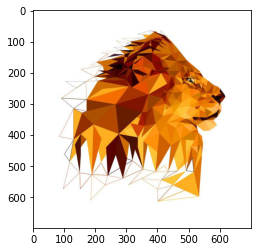

In [ ]:
# img1 = cv.imread('/content/drive/MyDrive/Lab/lion.jpg')
img1 = plt.imread('/content/drive/MyDrive/Lab/lion.jpg')

plt.imshow(img1)
plt.show()

In [ ]:
img1.shape

(700, 700, 3)

# Channel Seperation

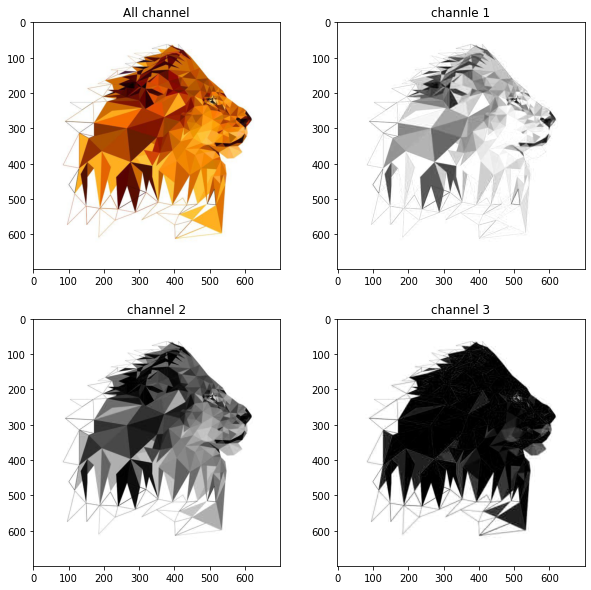

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(img1)
plt.title("All channel")

plt.subplot(2,2,2)
plt.imshow(img1[:, :, 0], cmap='gray')
plt.title("channle 1")

plt.subplot(2,2,3)
plt.imshow(img1[:, :, 1], cmap='gray')
plt.title("channel 2")

plt.subplot(2,2,4)
plt.imshow(img1[:, :, 2], cmap='gray')
plt.title("channel 3")

plt.show()

# Histogram of Seperated channel

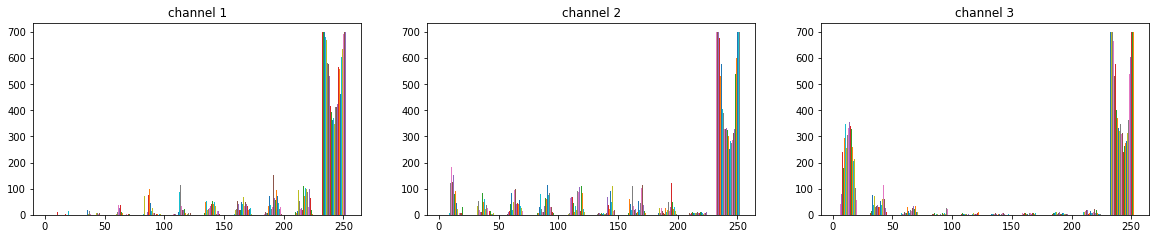

In [ ]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
plt.hist(img1[:, :, 0])
plt.title("channel 1")

plt.subplot(3,3,2)
plt.hist(img1[:, :, 1])
plt.title("channel 2")

plt.subplot(3,3,3)
plt.hist(img1[:, :, 2])
plt.title("channel 3")

plt.show()

# Image Inversion

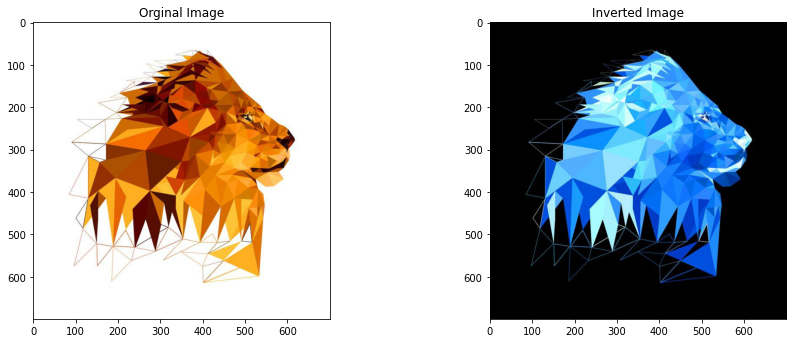

In [ ]:
height, width, channel = img1.shape

inverted_img = np.zeros(img1.shape, np.uint8)

for i in range(0, height):
  for j in range(0, width):
    for k in range(0, channel):
      inverted_img[i, j, k] = 255 - img1[i, j, k]

plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
plt.imshow(img1)
plt.title("Orginal Image")

plt.subplot(2, 2, 2)
plt.imshow(inverted_img)
plt.title("Inverted Image")
plt.show()

# Image Segmentation Using Threshold (245)

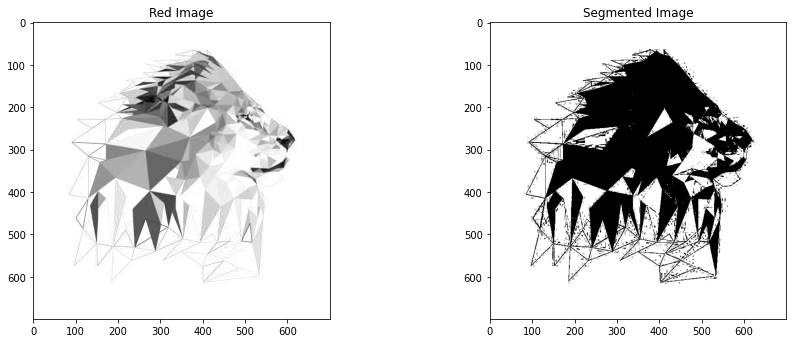

In [ ]:
red_img = img1[:, :, 0]

segmented_img = np.zeros(img1[:, :, 0].shape, np.uint8)

for i in range(0, width):
  for j in range(0, height):
    if img1[i, j, 0] > 245:
      segmented_img[i, j] = 255


plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
plt.imshow(img1[:, :, 0], cmap='gray')
plt.title("Red Image")

plt.subplot(2, 2, 2)
plt.imshow(segmented_img, cmap='gray')
plt.title("Segmented Image")
plt.show()

# Generating Histogram Manually

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png

--2021-08-11 07:11:34--  https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘Lenna_(test_image).png.4’

Lenna_(test_image). 100%[===================>] 462.73K  --.-KB/s    in 0.07s   

2021-08-11 07:11:35 (6.35 MB/s) - ‘Lenna_(test_image).png.4’ saved [473831/473831]



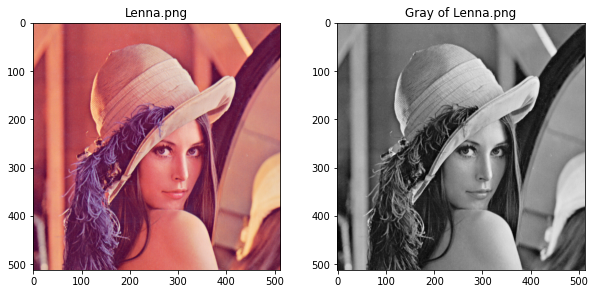


Image Size:  (512, 512)


In [ ]:
img2 = Image.open(r'/content/Lenna_(test_image).png')  #/content/drive/MyDrive/Lab/hill.jpg
gray_img = ImageOps.grayscale(img2)

# gray_img.show()

plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plt.imshow(img2)
plt.title("Lenna.png")

plt.subplot(2,2,2)
plt.imshow(gray_img, cmap='gray')
plt.title("Gray of Lenna.png")

plt.show()

print("\nImage Size: ", gray_img.size)

In [ ]:
hist = {}

for i in range (256):
    hist[i] = 0

for i in range (512):
  for j in range (512):
    x_y = i, j
    v = gray_img.getpixel(x_y)   #getpixel return the coordinate's value
    hist[v] += 1

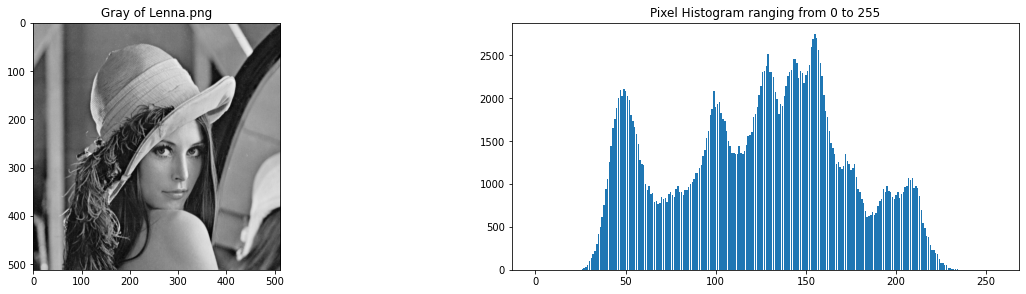

In [ ]:
plt.figure(figsize=(20, 10))

x_pos = np.arange(len(hist.keys()))   #?

ax = plt.axes()
ax.set_xticks(x_pos)

plt.subplot(2,2,1)
plt.imshow(gray_img, cmap='gray')
plt.title("Gray of Lenna.png")

plt.subplot(2,2,2)
plt.bar(hist.keys(), hist.values())
plt.title('Pixel Histogram ranging from 0 to 255')

plt.show()

# Histogram Equlization
using : 
* PDF (Probability Distribution Function)
* CDF (Cumulative Distribution Function)

In [ ]:
smallest = np.amin(gray_img)
largest = np.amax(gray_img)
# smallest, largest

pixel_values = hist.values()
total = sum(pixel_values)
print("Maximum pixel value= ", largest)
print("Total Values: ", total)

Maximum pixel value=  245
Total Values:  262144


In [ ]:
pdf = {}  #PDF (Probability Distribution Function)
pdf = {key: (hist[key]/total) for key in hist.keys()}

In [ ]:
cdf = {}  #CDF (Cumulative Distribution Function)
cdf[0] = pdf[0]

for i in range(1, 255):
  cdf[i] = cdf[i-1] + pdf[i]

for i in range(0, largest+1):
  cdf[i] = cdf[i]*largest

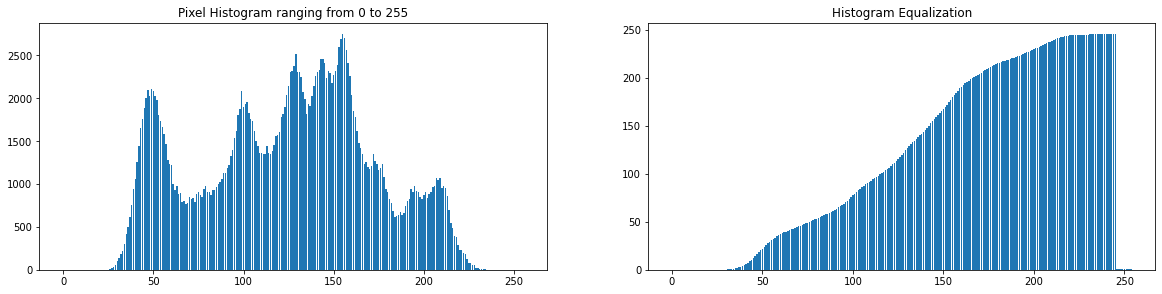

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(2,2,1)
plt.bar(hist.keys(), hist.values())
plt.title('Pixel Histogram ranging from 0 to 255')

plt.subplot(2,2,2)
plt.bar(cdf.keys(), cdf.values())
plt.title('Histogram Equalization')
plt.show()

# Image Intensity Transformation


*   Negative
*   Log Operation
*   Power Law



**Image Negative** or Image Inversion


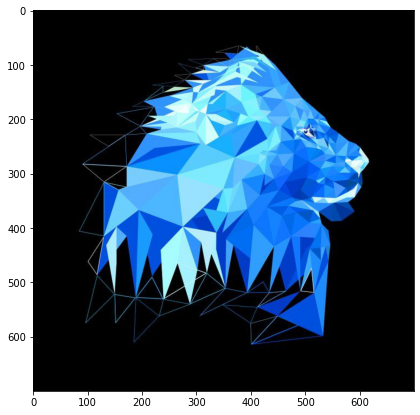

In [ ]:
plt.figure(figsize=(7, 7))
plt.imshow((255-img1), cmap='gray')
plt.show()

**Log Operation**

```
s = c * log(1 + r)
c = 255 / log(1 + r.max) ; where r>=0
```
We use a transformation of this type to expand
the values of dark pixels in an image while compressing the higher-level values.
The opposite is true of the inverse log transformation.

In [ ]:
c = np.int16(np.fix(255/(np.log10(1 + img1.max()))))      # numpy.fix : Round an array of floats element-wise to nearest integer towards zero.
s = np.int16(c * np.log10(1 + img1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


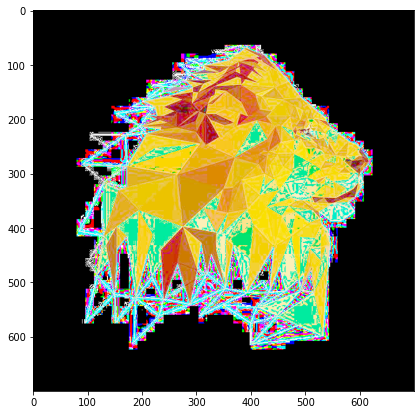

In [ ]:
plt.figure(figsize=(7, 7))
plt.imshow(s, cmap='gray')
plt.show()

**Power Law**


```
s = c(r)^Y
```


Power-law curves with fractional values of Y (gamma) map a narrow range of dark input values into a wider range of output values, with the opposite being true for higher values of input levels.

In [ ]:
c = 255/(np.power(img1.max(), 0.04))
s = np.int16(np.fix(c*np.power(img1, 0.04)))

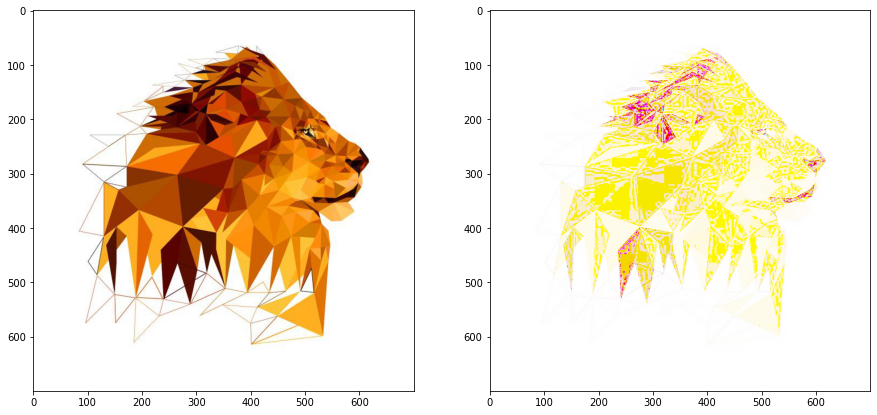

In [ ]:
_, pic = plt.subplots(1,2 , figsize=(15, 7))
pic[0].imshow(img1, cmap='gray')
pic[1].imshow(s, cmap='gray')

# Smoothing & Sharpening

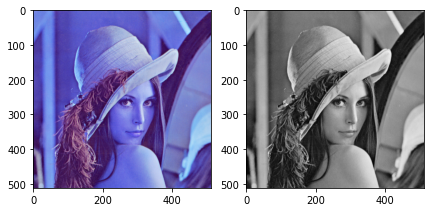

In [ ]:
img3 = cv.imread('/content/Lenna_(test_image).png')

gray = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)

_, pic = plt.subplots(1,2 , figsize=(7, 7))
pic[0].imshow(img3)
pic[1].imshow(gray, cmap='gray')
plt.show()

In [ ]:
def apply(img, filter):
  row, col = img.shape
  pad = (filter.shape[0]-1) // 2
  image = np.zeros((row+2*pad, col+2*pad))    #padding

  image[pad:row+pad, pad:col+pad] = img       #image positioning
  res = np.zeros(img.shape)

  for i in range(pad, row+pad):
    for j in range(pad, col+pad):
      res[i-pad, j-pad] = np.sum(image[(i-pad):(i+pad+1), (j-pad):(j+pad+1)]*filter)  #convolution
  
  # M = np.max(res)
  # res = (255 / M) * res

  return np.int32(np.fix(res))

In [ ]:
smooth_filter = np.ones((5,5))

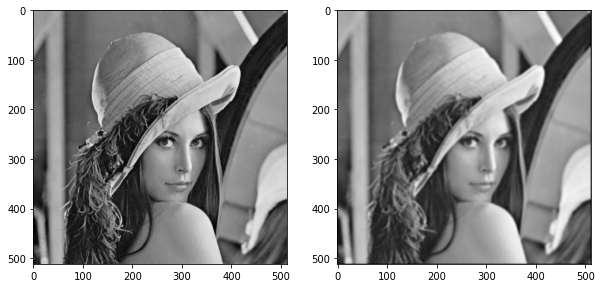

In [ ]:
smooth_filter /= 25
smooth_img = apply(gray, smooth_filter)

_, pic = plt.subplots(1,2 , figsize=(10, 10))
pic[0].imshow(gray, cmap='gray')
pic[1].imshow(smooth_img, cmap='gray')
plt.show()

In [ ]:
sharp_filter = np.ones((3, 3))

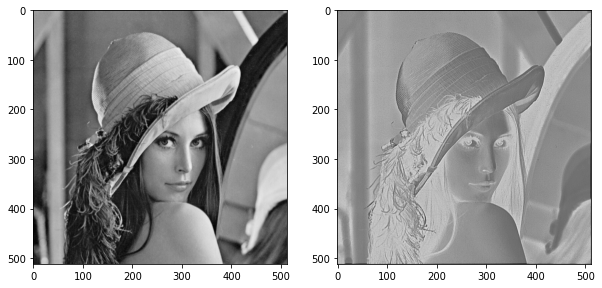

In [ ]:
sharp_filter[1, 1] = -11
sharp_img = apply(gray, sharp_filter)

_, pic = plt.subplots(1,2 , figsize=(10, 10))
pic[0].imshow(gray, cmap='gray')
pic[1].imshow(sharp_img, cmap='gray')
plt.show()